# Customer segmentation (Mall customers)

## Mall customers dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from minisom import MiniSom 
from sklearn.metrics import silhouette_score, davies_bouldin_score


In [2]:
# import warnings
# warnings.filterwarnings("ignore")  # Ignore all warnings

In [3]:
# pip install SwarmPackagePy

In [4]:
# pip install threadpoolctl


In [5]:
mall_df = pd.read_csv('Mall_Customers.csv')
mall_df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


### Aim: To cluster Mall Customers based on numerical and categorical features.

Dataset Attributes

* CustomerID : Unique ID assigned to the customer
* Gender : Gender of the customer
* Age : Age of the customer
* Annual Income (k$) : Annual Income of the customer
* Spending Score (1-1000) : Score assigned by the mall based on customer behavior and spending nature

### 1. EDA And Preproccessing

In [6]:
## Check number of rows and columns
mall_df.shape

(200, 5)

The dataset has a total of 200 customers/observations and 5 variables.

In [7]:
#dataset info
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


The datset consists of categorical and numerical variables.
The categorical variables will be converted into numerical variables before performing any analysis.

In [8]:
#check for duplicates
mall_df.duplicated().sum()

0

The duplicated function was used to check the data for duplicates. No duplicates were found, so the dataset does not contain any duplicate entries. This is beneficial as it eliminates the need for further data cleaning or the removal of duplicate records, ensuring the accuracy of the analysis. 

In [9]:
#check for null values in each column
mall_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
#check for null values in the whole dataset
mall_df.isnull().sum().sum()

0

In [11]:
#check for missing values in each column
mall_df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [12]:
#check for missing values in the whole dataset
mall_df.isna().sum().sum()

0

The isna and isnull functions were used to check the dataset for any null or missing values. The dataset contains no null or missing values and thus requires no further data cleaning or imputation. This ensures the dataset is complete and ready for analysis.

In [13]:
#Drop customer ID

df =mall_df.drop(['CustomerID'],axis=1)
df.rename(columns={'Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score'},inplace=True)

In [14]:
# Summary statistics
df.describe()

,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


### 2. Summary Statistics: 

The dataset comprises customer information, including their age, annual income, and spending score. 



#### i. Age: 

* The dataset consists of 200 customers with an average age of 38.85 years and a standard deviation of 13.97 years. 

* The ages of the customers range from 18 to 70.

* Quartiles: 
  * Lower Quartile: 28.75 years old 
  * Median: 36 years old 
  * Upper Quartile: 49 years old 

* This suggests that the majority of customers (50% of them) fall within the age range of 28.75 to 49 years old, while there are some younger and older customers as well.

#### ii. Annual Income: 

* The dataset covers 200 customers with an average annual income of 60.56 thousand dollars and a standard deviation of 26.36 thousand dollars. 
* The range of annual income spans from 15 thousand dollars to 137 thousand dollars.
* Quartiles: Lower Quartile:
  * 41.5 thousand dollars
  * Median: 61.5 thousand dollars 
  * Upper Quartile: 78 thousand dollars 
 
* This indicates a significant variation in the annual income of customers, with some earning less than the average and others earning more. 

#### iii. Spending Score: 

* The spending score averages 50.2, indicating a moderate level of spending among the customers. 
* The standard deviation of 25.82 suggests a wide variation in spending habits, with some customers spending much more or less than the average. 
* The spending score ranges from 1 (lowest) to 99 (highest).
* Quartiles:
   * Lower Quartile: 34.75 
   * Median: 50 
   * Upper Quartile: 73 

* This implies that the majority of customers fall within the middle range of spending scores, while there are both high-spending and low-spending outliers.
* The wide range of spending scores indicates that there is a diverse customer base with varying levels of purchasing power. 

These summary statistics provide valuable insights into the customers' characteristics, allowing for a better understanding of their age distribution, financial capacity, and spending behaviour.

### 3.  Data visualization

In [15]:
#Gender proportion
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

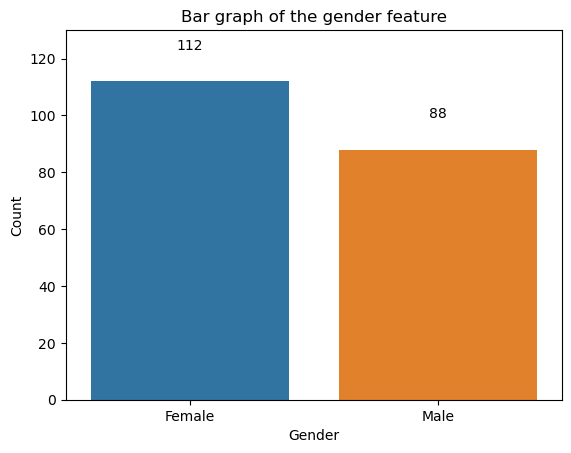

In [16]:
#Bar plot of Gender

categories = ['Female', 'Male']
values = df.Gender.value_counts()

# Create the bar plot
sns.barplot(x=categories, y=values)

# Add bar labels
for i, v in enumerate(values):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

# Customize the plot
plt.xlabel('Gender')
plt.ylabel('Count')
plt.ylim(0, 130)
plt.title('Bar graph of the gender feature')

# Display the plot
plt.show()

The dataset comprises 200 mall customers, with 112 (56%) identified as female and 88 (44%) as male. The gender distribution in the dataset slightly favours female customers. This insight can prove valuable in devising targeted marketing strategies and understanding gender-specific shopping habits. Typically, females tend to spend more time at the mall compared to males. Analysing the gender distribution can also provide valuable insights into potential gender-specific product preferences, enabling tailored advertising campaigns that resonate with each demographic. Understanding gender dynamics in customer behaviour helps businesses cater to the diverse needs of their clientele, ultimately leading to enhanced customer satisfaction and loyalty.

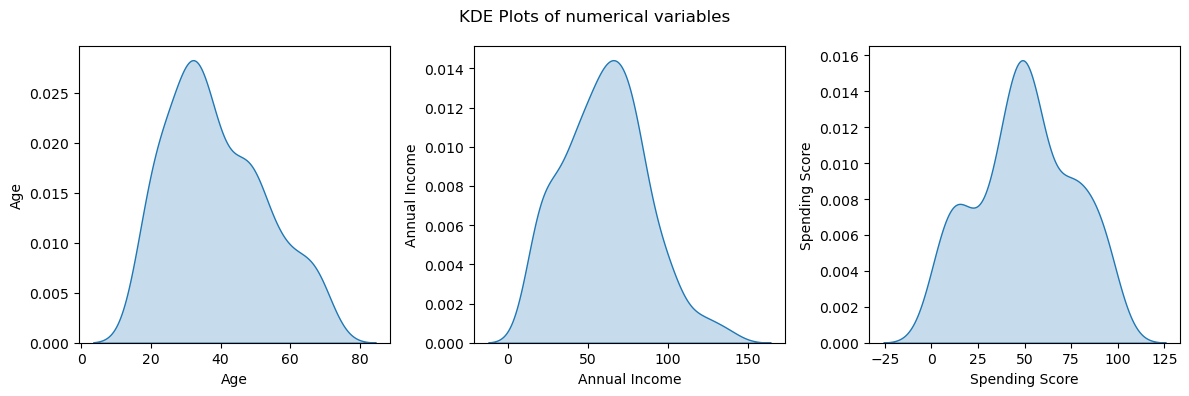

In [17]:

fig,ax = plt.subplots(1,3, figsize=(12,4))

sns.kdeplot(data = df['Age'],shade=True,ax=ax[0])
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Age')

sns.kdeplot(data = df['Annual Income'],shade=True,ax=ax[1])
ax[1].set_xlabel('Annual Income')
ax[1].set_ylabel('Annual Income')

sns.kdeplot(data = df['Spending Score'],shade=True, ax =ax[2])
ax[2].set_xlabel('Spending Score')
ax[2].set_ylabel('Spending Score')

plt.suptitle('KDE Plots of numerical variables')
plt.tight_layout()
plt.show()


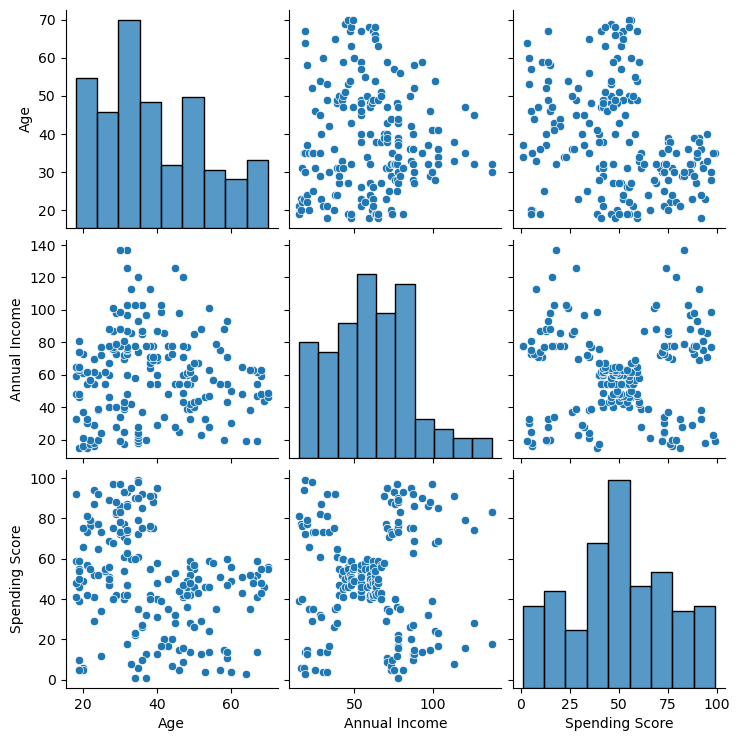

In [18]:
#Pair plots 
sns.pairplot(df)
plt.show()

Kernel density estimation (KDE) plots and pair plots, including histograms and scatterplots of age, annual income, and spending score, were created to identify patterns and trends in the data.


* Age: The KDE plot and histogram of age indicate a slight right skewness, suggesting that the majority of customers are younger than the average age of 38.85 years. 

* Annual Income: The KDE plot and histogram of annual income show a slight positive skewness, implying that most customers have lower annual incomes. 

* Spending Score: The KDE plot and histogram of the spending score display a somewhat balanced distribution across different score ranges. However, there is a noticeable cluster of customers with high spending scores, indicating a potential target group for marketing strategies. 



Correlations: 

* The scatterplots reveal weak correlations among age, annual income, and spending score variables, suggesting no strong relationship between these variables. 
* Age and spending score show a negative correlation, indicating that, on average, older customers tend to have lower spending scores. However, the correlation is not strong, suggesting that age alone may not be a reliable predictor of spending behaviour.
* Similarly, age and annual income have a very weak negative correlation, indicating that there is a slight tendency for older customers to have slightly lower annual incomes. However, this correlation is not significant enough to draw any definitive conclusions about the relationship between age and annual income. 
* Within the annual income vs. spending score scatter plot, the data appears to form five distinct groups, indicating different spending behaviours based on annual income. This suggests that factors other than age may significantly influence spending habits, such as individual preferences, lifestyle choices, or financial responsibilities. 

Overall, these visualisations provide valuable insights into the distribution of age, annual income, and spending score and highlight potential customer segments that businesses can target in their marketing strategies. It also emphasises the need to consider multiple factors beyond age when understanding the spending behaviours of customers.


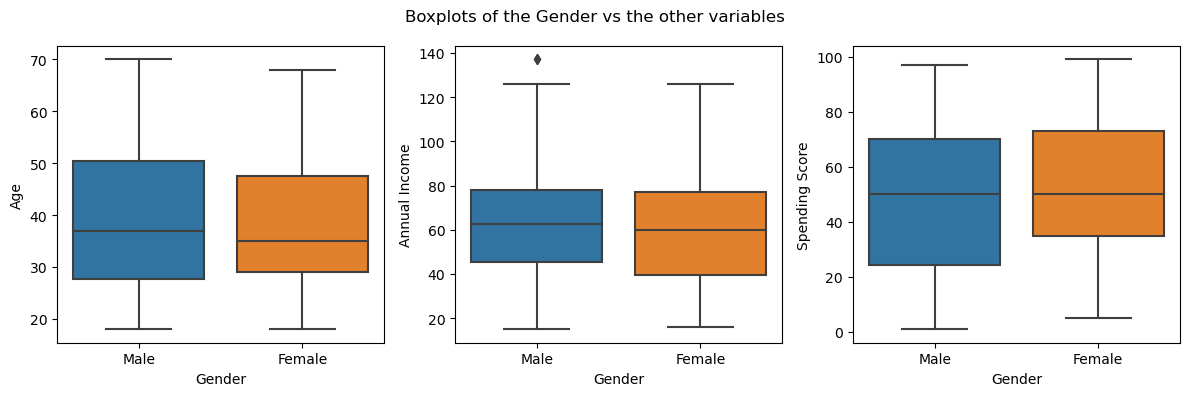

In [19]:
#Box plots

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.boxplot(x='Gender', y='Age', data=df, ax=axs[0])
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Age')

sns.boxplot(x='Gender', y='Annual Income', data=df, ax=axs[1])
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Annual Income')

sns.boxplot(x='Gender', y='Spending Score', data=df, ax=axs[2])
axs[2].set_xlabel('Gender')
axs[2].set_ylabel('Spending Score')

plt.suptitle('Boxplots of the Gender vs the other variables')
plt.tight_layout()
plt.show()

Boxplots of the three variables were used to compare the distribution of age, annual income, and spending score between genders. The analysis revealed slight variations in these variables between males and females. 

In the gender vs. age boxplot, the box for males is slightly taller than that for females, indicating a larger interquartile range (IQR) and higher variability in the ages of the male group. This suggests that there may be more diversity among males compared to females. 

Similarly, in the gender vs. annual income boxplot, the median income for males is slightly higher than that for females, hinting at a potential difference in earning potential between the two genders.

Lastly, in the gender vs. spending score boxplot, the box for females is slightly higher than that for males, suggesting that female customers have higher spending scores on average. This implies that females may be more inclined to spend more money on products or services compared to males. 

Overall, the boxplots offer valuable insights into the distribution of these variables, highlighting potential gender-related distinctions in age, income, and spending behaviour. Further analysis and consideration of these observations can aid in tailoring marketing strategies and services to better meet the preferences and needs of different gender groups.

### 4. Data preprocessing 

The categorical gender variable was converted to a numerical variable by using binary encoding, where males were assigned a value of 0 and females were assigned a value of 1. This conversion allows for easier analysis and comparison of gender-related variables with other numerical variables in the dataset. 

In [20]:
# Encode gender varaible into 0 and 1 
df['Gender'].replace({"Male":0,"Female":1}, inplace=True)

In [21]:
#Correlation 
corr = df.corr(method = 'pearson')
corr

,Gender,Age,Annual Income,Spending Score
Gender,1.000000,-0.060867,-0.056410,0.058109
Age,-0.060867,1.000000,-0.012398,-0.327227
Annual Income,-0.056410,-0.012398,1.000000,0.009903
Spending Score,0.058109,-0.327227,0.009903,1.000000


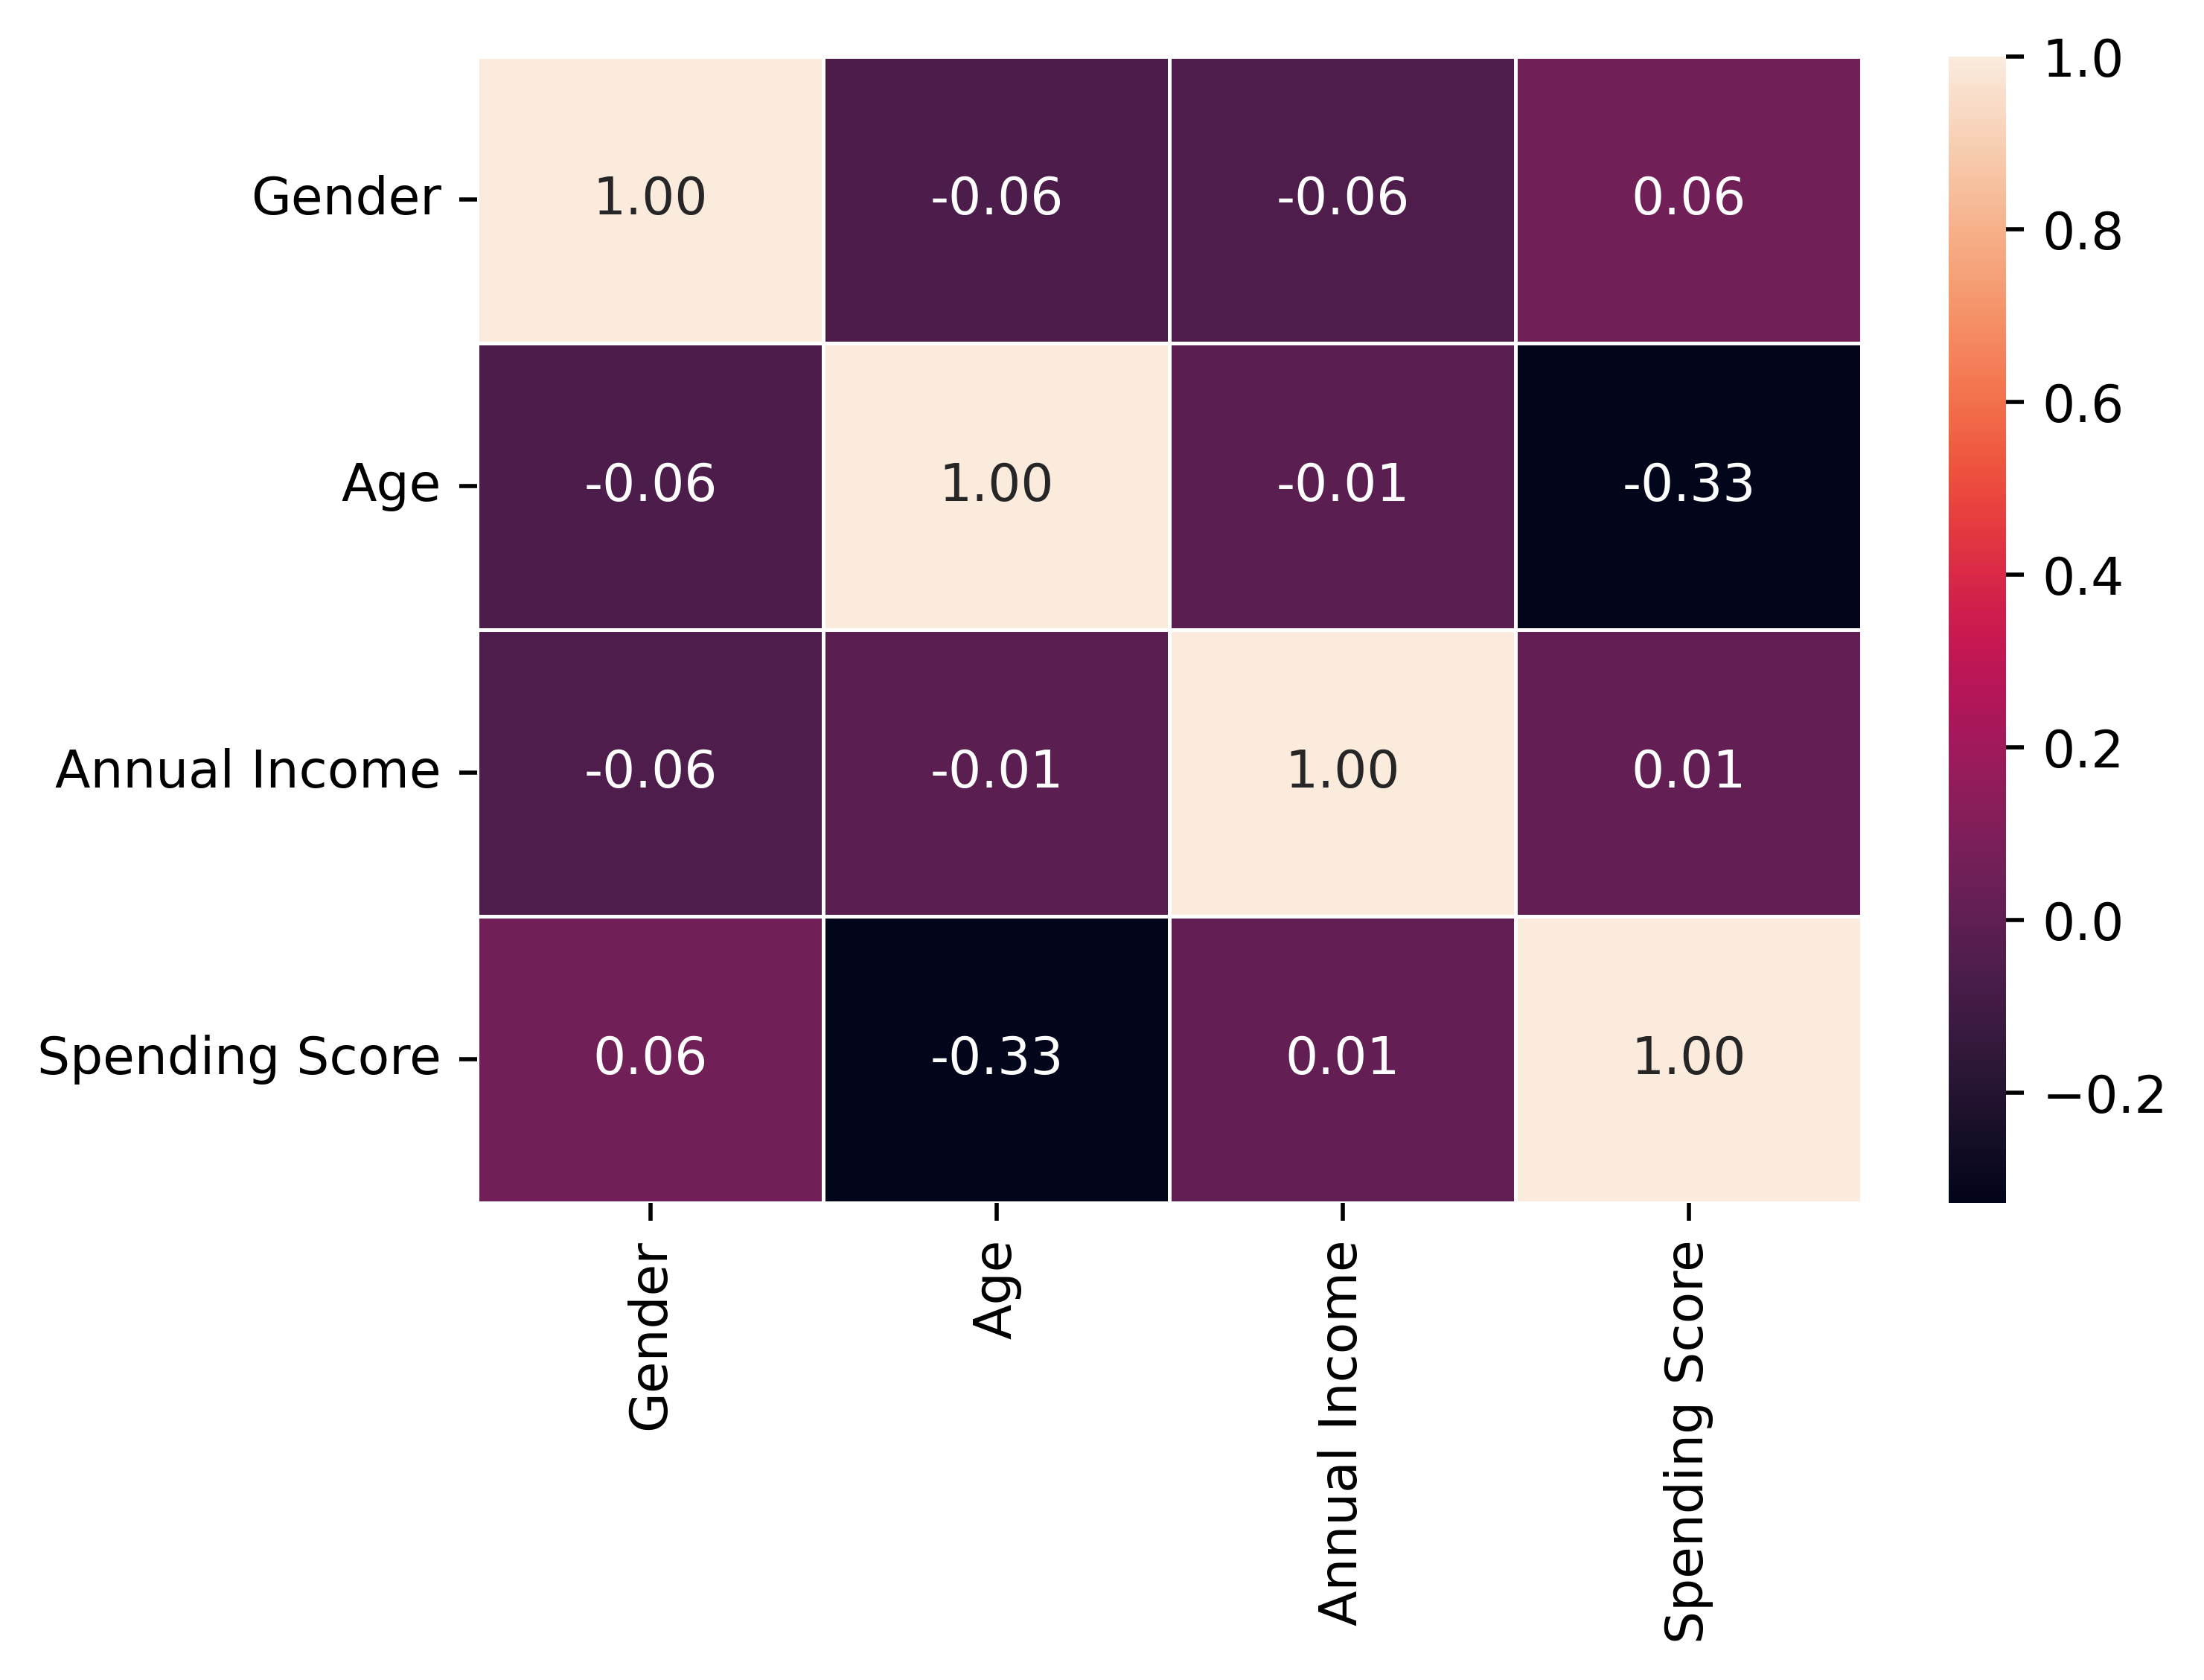

In [22]:
#Correlation heatmap
plt.figure(figsize=(6, 4), dpi=500)
sns.heatmap(corr, annot=True, fmt=".2f", linewidth=.5)
plt.show()

The correlation heatmap again shows weak correlations amongst the gender, age, annual income, and spending score variables, indicating that there is no strong linear relationship between these variables.

The correlation coefficients remain close to zero, reaffirming that changes in one variable are not significantly associated with proportional changes in another variable. Specifically:

* Gender, after being encoded as a numerical variable, shows a weak correlation with the other numerical variables. However, since gender is a binary variable (0 or 1), the correlation coefficient may not be highly informative. 
* Age continues to exhibit a weak negative correlation with the spending score, suggesting that, on average, as customers get older, their spending score tends to decrease slightly. However, the correlation coefficient remains close to zero, implying that age alone may not be a strong predictor of spending behaviour. 
* Annual income still displays a weak positive correlation with the spending score, indicating that, on average, customers with higher annual incomes tend to have slightly higher spending scores.Nevertheless, the correlation coefficient remains near zero, suggesting that annual income alone may not strongly influence spending behaviour.

Overall, the weak correlations between these variables emphasise that additional factors, beyond gender, age, and annual income, are likely to significantly impact customer spending behaviour. Consequently, further exploration and analysis of additional variables are necessary to gain a comprehensive understanding of the complex factors that influence customer spending habits.

#### Scaling data


The numerical gender variable is measured on a different scale compared to the other three numerical variables. To address this, the data was standardised using the Minmax function from the scikit-learn package. This ensured that all variables were on the same scale and could be directly compared. Standardising the data also helped to reduce the impact of outliers and improve the accuracy of any statistical analysis performed on the variables.

In [23]:
from sklearn.preprocessing import MinMaxScaler

new_df = df.drop(['Gender'],axis=1)
scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(new_df)

df_array = np.array(new_df)

### 6. Clustering

In [24]:
# !pip install minisom

In [25]:
from minisom import MiniSom  

In [26]:
seed_value = 42
np.random.seed(seed_value)

### Choosing the best parameters using a gridsearch


i. Define the Hyperparameter Grid

In [27]:
param_grid = {
    'x': [5, 10],         # Number of columns in the SOM grid
    'y': [5, 10],         # Number of rows in the SOM grid
    'input_len': [scaled_data.shape[1]],  # Number of input features
    'sigma': [1.0, 2.0],      # Initial neighborhood radius
    'learning_rate': [0.5, 0.9],  # Learning rate
    'random_seed': [42]       # Seed for reproducibility
}
param_grid

{'x': [5, 10],
 'y': [5, 10],
 'input_len': [3],
 'sigma': [1.0, 2.0],
 'learning_rate': [0.5, 0.9],
 'random_seed': [42]}

ii. Perform Grid Search

In [28]:
from itertools import product
from sklearn.metrics import mean_squared_error

best_mse = float('inf')
best_params = {}

num_epochs = 100
num_samples = 5

for params in product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))
    som = MiniSom(**param_dict)
    som.random_weights_init(scaled_data) 
    
    # Train the SOM
    for i in range(num_epochs):
        som.train_random(scaled_data, num_samples)

    # Calculate the Mean Squared Error
    map_neurons = som.win_map(scaled_data)
    mse = mean_squared_error(scaled_data, som.quantization(scaled_data))
    
    # Update best parameters if needed
    if mse < best_mse:
        best_mse = mse
        best_params = param_dict

print("Best parameters:", best_params)
print("Best MSE:", best_mse)


Best parameters: {'x': 10, 'y': 10, 'input_len': 3, 'sigma': 1.0, 'learning_rate': 0.5, 'random_seed': 42}
Best MSE: 0.010293092994285739


### Best parameters:
    
* x:10
* y:10,
* sigma:1.0,
* learning_rate: 0.5

In [29]:
X = new_df
X = np.array(X)


### Comparison

a. Traditional SOM 

In [30]:
def train_traditional_som(X, x_dim, y_dim, num_epochs=num_epochs, sigma=0.1, learning_rate=0.5):
    som = MiniSom(x=x_dim, y=y_dim, input_len=X.shape[1], sigma=sigma, learning_rate=learning_rate)
    som.random_weights_init(X)
    som.train_random(data=X, num_iteration=num_epochs)
    return som

def evaluate_traditional_som(X, x_dim, y_dim):
    som = train_traditional_som(X, x_dim, y_dim)
    som_clusters = np.array([som.winner(x) for x in X])

    quantization_error = som.quantization_error(X)
    topographic_error = som.topographic_error(X)
    
    
#     # Cluster the data using K-Means based on SOM cluster centers
#     kmeans = KMeans(n_clusters=y_dim, random_state=42)
#     kmeans.fit(som_clusters)
#     labels = kmeans.labels_

#     # Calculate Davies-Bouldin Index
#     davies_bouldin_index = davies_bouldin_score(X, labels)

#     # Calculate Silhouette Score
#     silhouette_avg = silhouette_score(X, labels)
    

    return quantization_error, topographic_error

# Set your parameters
x_dim = 1
y_dim = 5
num_epochs = 500

X = scaled_data[:,[1,2]]

# # Lists to store error values
# ts_quantization_errors = []
# ts_topographic_errors = []
# ts_davies_bouldin_indices = []
# ts_silhouette_scores = []

# for epoch in range(1, num_epochs + 1):
#     quantization_error, topographic_error, davies_bouldin_index, silhouette_avg = evaluate_traditional_som(X, x_dim, y_dim)
#     ts_quantization_errors.append(quantization_error)
#     ts_topographic_errors.append(topographic_error)
#     ts_davies_bouldin_indices.append(davies_bouldin_index)
#     ts_silhouette_scores.append(silhouette_avg)


In [31]:
sns.set(font_scale=1.5)

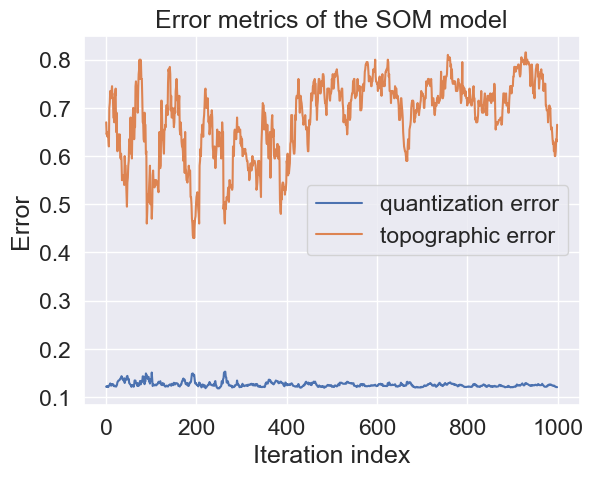

In [32]:
som_shape = (1, 5)

som =train_traditional_som(X, x_dim, y_dim, num_epochs=num_epochs)

max_iter = 1000
q_error = []
t_error = []

data = X
for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('Error')
plt.xlabel('Iteration index')
plt.title('Error metrics of the SOM model')
plt.legend()
plt.show()

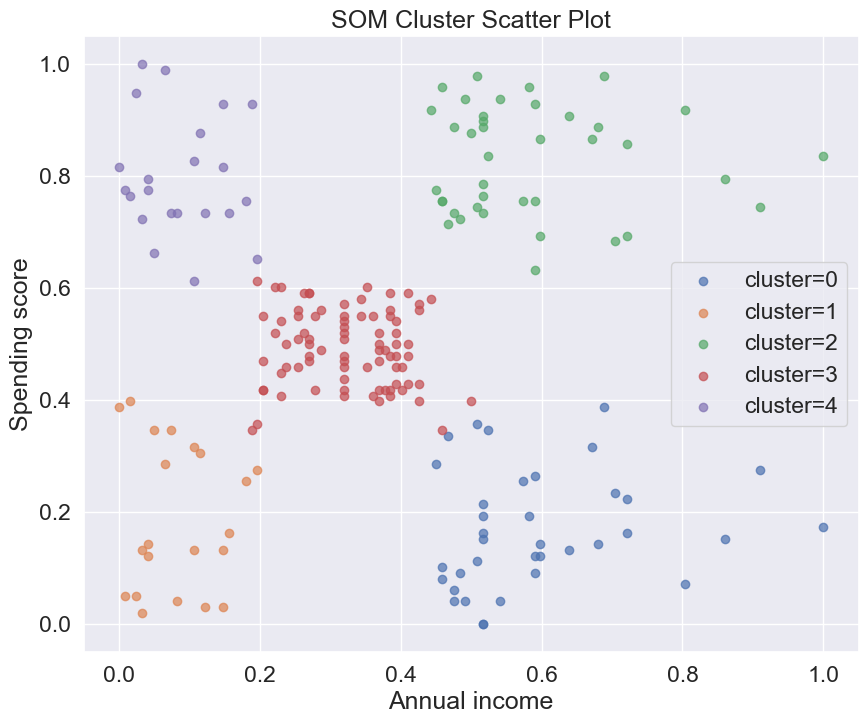

In [33]:
# Plotting the clusters 
# som = train_traditional_som(X, x_dim, y_dim)
som_orig =train_traditional_som(X, x_dim, y_dim, num_epochs=num_epochs)
winner_coordinates = np.array([som_orig.winner(x) for x in X]).T
cluster_index_orig = np.ravel_multi_index(winner_coordinates, (x_dim,y_dim))

plt.figure(figsize=(10,8))

for c in np.unique(cluster_index_orig):
    plt.scatter(X[cluster_index_orig == c, 0],
                X[cluster_index_orig == c, 1], label='cluster='+str(c), alpha=.7)

plt.title("SOM Cluster Scatter Plot")
plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.legend()
plt.show()

In [34]:
# Calculate Quantization Error
quantization_error1 = som_orig.quantization_error(X)
print("Quantization error: ",quantization_error1)

# Calculate Topographic Error
topographic_error1 = som_orig.topographic_error(X)
print("Topogaphic error: ",topographic_error1)


Quantization error:  0.11815810277605351
Topogaphic error:  0.48


b. SOM mixed with k-means

In [35]:
# # Implement SOM with MiniSom and k-means
# def train_som_kmeans(X, x_dim, y_dim, num_epochs=300, sigma=1.0, learning_rate=0.5):
#     som = MiniSom(x=x_dim, y=y_dim, input_len=X.shape[1], sigma=sigma, learning_rate=learning_rate)
#     som.random_weights_init(X)
#     som.train_random(data=X, num_iteration=num_epochs)
    
#     som_clusters = np.array([som.winner(x) for x in X])
    
#     return som_clusters


# def evaluate_som_kmeans(som_clusters,kmeans_clusters):
#     kmeans = KMeans(n_clusters=kmeans_clusters)
#     kmeans.fit(som_clusters)
#     labels = kmeans.labels_

#     quantization_error = som.quantization_error(X)
#     topographic_error = som.topographic_error(X)
    
#     return quantization_error, topographic_error


In [36]:
def som_kmeans(X, x_dim, y_dim,kmeans_clusters, num_epochs=num_epochs, sigma=0.0001, learning_rate=0.5):
    som = MiniSom(x=x_dim, y=y_dim, input_len=X.shape[1], sigma=sigma, learning_rate=learning_rate)
    som.random_weights_init(X)
    som.train_random(data=X, num_iteration=num_epochs)
    
    som_clusters = np.array([som.winner(x) for x in X])
    
    kmeans = KMeans(n_clusters=kmeans_clusters)
    kmeans.fit(som_clusters)
    labels = kmeans.labels_

#     quantization_error = som.quantization_error(X)
#     topographic_error = som.topographic_error(X)
    
    # Calculate Davies-Bouldin Index
    davies_bouldin_index = davies_bouldin_score(X, labels)

    # Calculate Silhouette Score
    silhouette_avg = silhouette_score(X, labels)
    
    return som,labels, davies_bouldin_index, silhouette_avg




# Set parameters
x_dim = 1
y_dim = 5
kmeans_clusters = 5
num_epochs = 500


# Lists to store error values
sk_quantization_errors = []
sk_topographic_errors = []
sk_davies_bouldin_indices = []
sk_silhouette_scores = []
    
# for epoch in range(1, num_epochs + 1):
#     som,labels, quantization_error, topographic_error, davies_bouldin_index, silhouette_avg = som_kmeans(X, x_dim, y_dim,kmeans_clusters, num_epochs=1000, sigma=1.0, learning_rate=0.5)
#     sk_quantization_errors.append(quantization_error)
#     sk_topographic_errors.append(topographic_error)
#     sk_davies_bouldin_indices.append(davies_bouldin_index)
#     sk_silhouette_scores.append(silhouette_avg)
    
    


In [37]:
# # Plotting the clusters 

# trained_som,labels, quantization_error, topographic_error, davies_bouldin_index, silhouette_avg = som_kmeans(X, x_dim, y_dim,kmeans_clusters)

# plt.figure(figsize=(10,8))
# for c in np.unique(labels):
#     plt.scatter(X[labels == c,0], X[labels == c, 1], label='cluster ' + str(c))
    
# plt.title("SOM + kmeans Cluster Scatter Plot")
# plt.xlabel("Annual income")
# plt.ylabel("Spending score")
# plt.legend()
# plt.show()


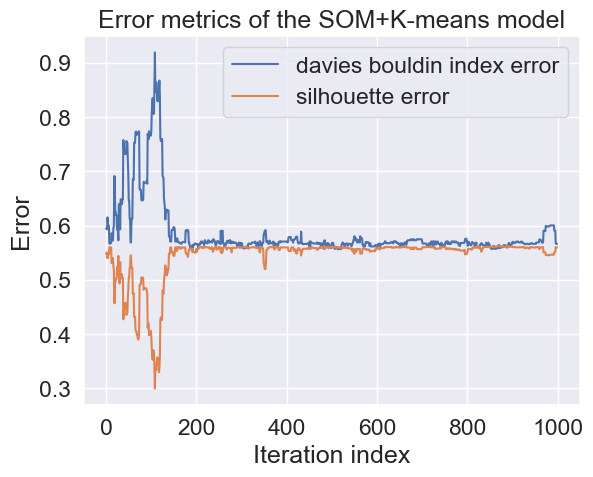

In [38]:
som_shape = (1, 5)

kmeans_som =som_kmeans(X, x_dim, y_dim,kmeans_clusters)[0]


max_iter = 1000
q_error_sk = []
t_error_sk = []
d_error_sk = []
s_error_sk = []


data = X

for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    kmeans_som.update(data[rand_i], kmeans_som.winner(data[rand_i]), i, max_iter)
    #q_error_sk.append(som_kmeans.quantization_error(data))
    #t_error_sk.append(som_kmeans.topographic_error(data))
      
    #Compute SOM cluster assignments
    som_clusters = np.array([kmeans_som.winner(x) for x in data])
    
     # Cluster the data using K-Means based on SOM cluster centers
    kmeans = KMeans(n_clusters=y_dim, random_state=42)
    kmeans.fit(som_clusters)
    labels = kmeans.labels_
    
    # Calculate Davies-Bouldin Index
    d_error_sk.append(davies_bouldin_score(data, labels))

    # Calculate Silhouette Score
    s_error_sk.append(silhouette_score(data, labels))
    

# plt.plot(np.arange(max_iter), q_error_sk, label='quantization error')
# plt.plot(np.arange(max_iter), t_error_sk, label='topographic error')
plt.plot(np.arange(max_iter), d_error_sk, label='davies bouldin index error')
plt.plot(np.arange(max_iter), s_error_sk, label='silhouette error')
plt.ylabel('Error')
plt.xlabel('Iteration index')
plt.title('Error metrics of the SOM+K-means model')
plt.legend()
plt.show()

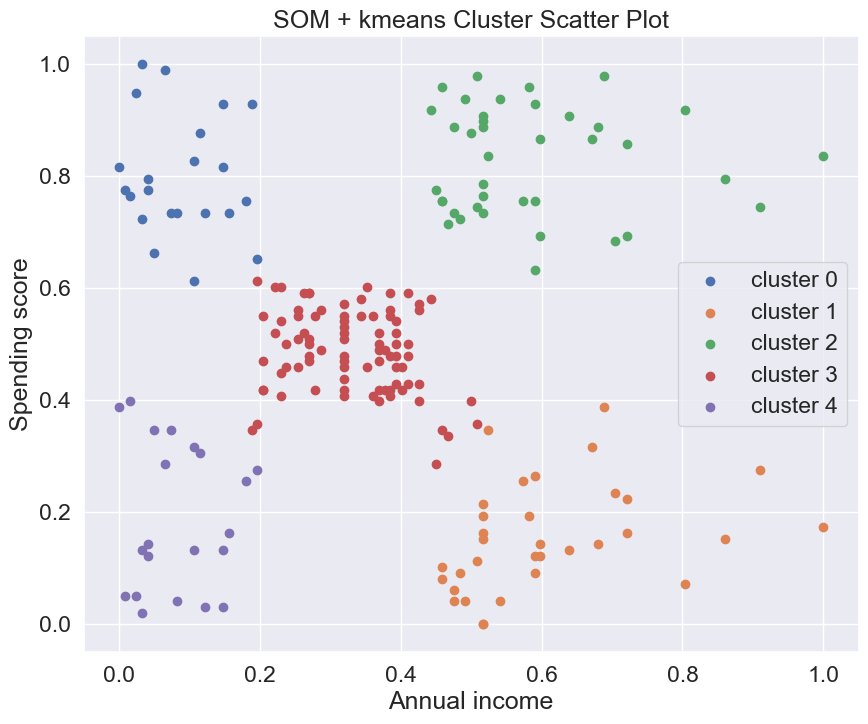

In [39]:
# # Plotting the clusters 
trained_som,labels, davies_bouldin_index, silhouette_avg = som_kmeans(X, x_dim, y_dim,kmeans_clusters)

plt.figure(figsize=(10,8))
for c in np.unique(labels):
    plt.scatter(X[labels == c,0], X[labels == c, 1], label='cluster ' + str(c))
    
plt.title("SOM + kmeans Cluster Scatter Plot")
plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.legend()
plt.show()

In [40]:


# Calculate Davies-Bouldin Index
print("Davies Bouldin index: ",davies_bouldin_index)

# Calculate Silhouette Score
print("Silhouette error: ",silhouette_avg)

Davies Bouldin index:  0.5627045957684448
Silhouette error:  0.5604639866457818


c. SOM combined with SSO

In [41]:
from SwarmPackagePy import ssa

def train_som_sso(X, x_dim, y_dim, num_epochs=num_epochs, sigma=1.0, learning_rate=0.5):
    som = MiniSom(x=x_dim, y=y_dim, input_len=X.shape[1], sigma=sigma, learning_rate=learning_rate)
    
    # Define the objective function
    def som_objective(weights):
        
        # Reshape the weights to match the shape of the SOM weights
        weights = np.reshape(weights, som.get_weights().shape)
        
        # Set the weights of the SOM
        som._weights = weights
        
        # Compute the quantization error of the SOM
        q_error = som.quantization_error(X)
        
        return q_error
    
    # Define the optimization problem
    n = 50  # number of agents
    
    function = som_objective  # objective function
    lb = -1  # lower bound for the weights
    ub = 1  # upper bound for the weights
    dimension = som.get_weights().size  # number of weights in the SOM
    iteration = 100  # number of iterations

    # Run the Social Spider Optimization algorithm
    alh = ssa(n, function, lb, ub, dimension, iteration)
    
    # Get the best position (i.e., weights) found by the algorithm
    best_weights = alh.get_Gbest()

    # Reshape the best weights to match the shape of the SOM weights
    best_weights = np.reshape(best_weights, som.get_weights().shape)

    # Set the weights of the SOM to the optimized weights
    som._weights = best_weights
    som.train_random(data=X, num_iteration=num_epochs)

    # Calculate the topographic error of the SOM
    topographic_error = som.topographic_error(X)
    
    # Compute the quantization error of the SOM
    quantization_error = som.quantization_error(X)
    
    
#     #Compute SOM cluster assignments
#     som_clusters = np.array([som.winner(x) for x in X])
    
#      # Cluster the data using K-Means based on SOM cluster centers
#     kmeans = KMeans(n_clusters=y_dim, random_state=42)
#     kmeans.fit(som_clusters)
#     labels = kmeans.labels_
    
#     # Calculate Davies-Bouldin Index
#     davies_bouldin_index = davies_bouldin_score(X, labels)

#     # Calculate Silhouette Score
#     silhouette_avg = silhouette_score(X, labels)
    
    return som, topographic_error,quantization_error  


ss_quantization_errors = []
ss_topographic_errors = []
ss_davies_bouldin_indices = []
ss_silhouette_scores = []

# for epoch in range(1, num_epochs + 1):
#     trained_som,topographic_error,quantization_error, davies_bouldin_index, silhouette_avg  = train_som_sso(X, x_dim, y_dim)
#     ss_quantization_errors.append(quantization_error)
#     ss_topographic_errors.append(topographic_error)
#     ss_davies_bouldin_indices.append(davies_bouldin_index)
#     ss_silhouette_scores.append(silhouette_avg)
    



In [42]:
# from SwarmPackagePy import ssa

# def train_som_sso(X, x_dim, y_dim, num_epochs=num_epochs, sigma=1.0, learning_rate=0.5):
#     som = MiniSom(x=x_dim, y=y_dim, input_len=X.shape[1], sigma=sigma, learning_rate=learning_rate)
    
#     # Define the objective function
#     def som_objective(weights):
#         # Reshape the weights to match the shape of the SOM weights
#         weights = np.reshape(weights, som.get_weights().shape)
        
#         # Set the weights of the SOM
#         som._weights = weights
        
#         # Compute the quantization error of the SOM
#         q_error = som.quantization_error(X)
        
#         return q_error

#     # Define the optimization problem
#     n = 50 # number of agents
#     function = som_objective # objective function
#     lb = -1 # lower bound for the weights
#     ub = 1 # upper bound for the weights
#     dimension = som.get_weights().size # number of weights in the SOM
#     iteration = num_epochs # number of iterations

#     # Run the Social Spider Optimization algorithm
#     alh = ssa(n, function, lb, ub, dimension, iteration)

#     # Get the best position (i.e., weights) found by the algorithm
#     best_weights = alh.get_Gbest()

#     # Reshape the best weights to match the shape of the SOM weights
#     best_weights = np.reshape(best_weights, som.get_weights().shape)

#     # Set the weights of the SOM to the optimized weights
#     som._weights = best_weights
#     som.train_random(data=X, num_iteration=num_epochs)
    
#     return som

# # def evaluate_som_sso(X, x_dim, y_dim):
# #     som = train_traditional_som(X, x_dim, y_dim)
    
# #     quantization_error = som.quantization_error(X)
# #     topographic_error = som.topographic_error(X)
    
# #     return quantization_error, topographic_error                               

# # Set your parameters
# x_dim = 1
# y_dim = 5
# num_epochs = 100

# # X = scaled_data

# # Lists to store error values
# ss_quantization_errors = []
# ss_topographic_errors = []

# # for epoch in range(1, num_epochs + 1):
# #     quantization_error, topographic_error = evaluate_som_sso(X, x_dim, y_dim)
# #     ss_quantization_errors.append(quantization_error)
# #     ss_topographic_errors.append(topographic_error)

    
# # Plot the errors over iterations
# # plt.figure(figsize=(10, 6))
# # plt.plot(range(1, num_epochs + 1), ss_quantization_errors, label='quantization')
# # plt.plot(range(1, num_epochs + 1), ss_topographic_errors, label='topographic')
# # plt.xlabel('Number of Epochs')
# # plt.ylabel('Error')
# # plt.title(' errors over Epochs')
# # plt.legend()
# # plt.grid()
# # plt.show()

In [43]:
# # Plotting the clusters 
# som_sso,topographic_error,quantization_error, davies_bouldin_index, silhouette_avg  = train_som_sso(X, x_dim, y_dim)
# winner_coordinates = np.array([som_sso.winner(x) for x in X]).T
# cluster_index = np.ravel_multi_index(winner_coordinates, (x_dim,y_dim))

# plt.figure(figsize=(10,8))

# for c in np.unique(cluster_index):
#     plt.scatter(X[cluster_index == c, 0],
#                 X[cluster_index == c, 1], label='cluster='+str(c), alpha=.7)

# plt.title("SOM + SSO Cluster Scatter Plot")
# plt.xlabel("Annual income")
# plt.ylabel("Spending score")
# plt.legend()
# plt.show()

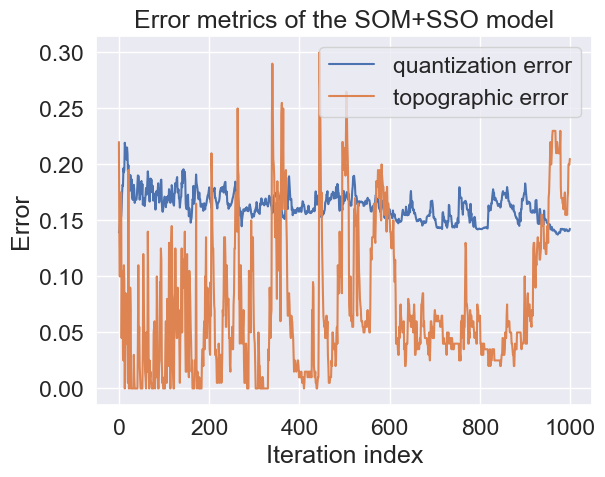

In [44]:
som_shape = (1, 5)

som_sso = train_som_sso(X, x_dim, y_dim, num_epochs=num_epochs)[0]


max_iter = 1000
q_error_sso = []
t_error_sso = []

data = X
for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som_sso.update(data[rand_i], som_sso.winner(data[rand_i]), i, max_iter)
    q_error_sso.append(som_sso.quantization_error(data))
    t_error_sso.append(som_sso.topographic_error(data))

plt.plot(np.arange(max_iter), q_error_sso, label='quantization error')
plt.plot(np.arange(max_iter), t_error_sso, label='topographic error')
plt.ylabel('Error')
plt.xlabel('Iteration index')
plt.title('Error metrics of the SOM+SSO model')
plt.legend()
plt.show()

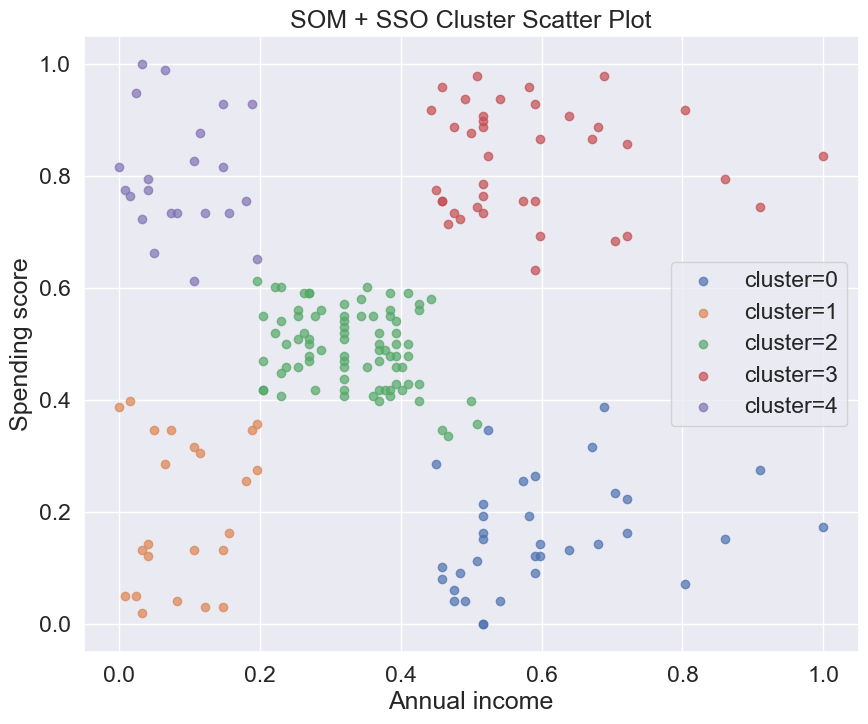

In [45]:
som_sso,topographic_error,quantization_error = train_som_sso(X, x_dim, y_dim)
winner_coordinates = np.array([som_sso.winner(x) for x in X]).T
cluster_index_sso = np.ravel_multi_index(winner_coordinates, (x_dim,y_dim))

plt.figure(figsize=(10,8))

for c in np.unique(cluster_index_sso):
    plt.scatter(X[cluster_index_sso == c, 0],
                X[cluster_index_sso == c, 1], label='cluster='+str(c), alpha=.7)

plt.title("SOM + SSO Cluster Scatter Plot")
plt.xlabel("Annual income")
plt.ylabel("Spending score")
plt.legend()
plt.show()

In [46]:
# Calculate Quantization Error
quantization_error2 = som_sso.quantization_error(X)
print("Quantization error: ",quantization_error2)

# Calculate Topographic Error
topographic_error2 = som_sso.topographic_error(X)
print("Topogaphic error: ",topographic_error2)


Quantization error:  0.122462623244712
Topogaphic error:  0.35


In [69]:
toy_df = df.copy()
toy_df['clusters'] = labels
toy_df

,Gender,Age,Annual Income,Spending Score,clusters
0,0,19,15,39,4
1,0,21,15,81,0
2,1,20,16,6,4
3,1,23,16,77,0
4,1,31,17,40,4
...,...,...,...,...,...
195,1,35,120,79,2
196,1,45,126,28,1
197,0,32,126,74,2
198,0,32,137,18,1


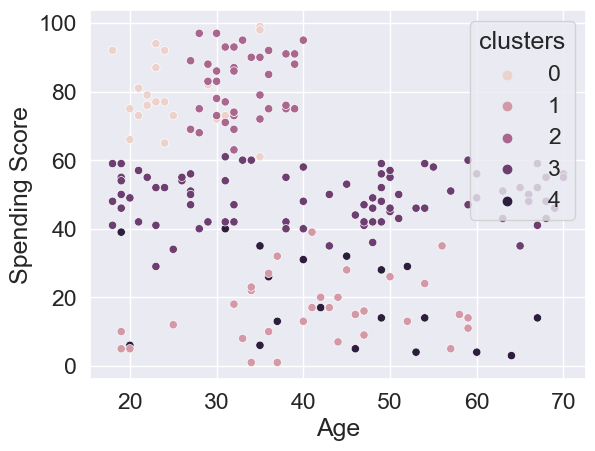

In [73]:
sns.scatterplot(x='Age',y='Spending Score', data=toy_df, hue='clusters')
plt.show()

## Evaluation

In [78]:

from scipy import stats

### som vs kmeans som 

# Combine error metrics from all three methods into a single data structure.
all_error_metrics = [
    q_error,  # Error metrics for normal SOM
    s_error_sk,  # Error metrics for SOM + K-means
]

# Perform ANOVA test to compare the three clustering methods.
_, p_value = stats.f_oneway(*all_error_metrics)

# Determine the significance level (alpha) for your test.
alpha = 0.05

# Print the results of the ANOVA test.
if p_value < alpha:
    print("There is a statistically significant difference in clustering performance (reject the null hypothesis).")
else:
    print("There is no statistically significant difference in clustering performance (fail to reject the null hypothesis).")

print(p_value)

There is a statistically significant difference in clustering performance (reject the null hypothesis).
0.0


In [79]:

### som vs sso som

# Combine error metrics from all three methods into a single data structure.
all_error_metrics = [
    q_error,  # Error metrics for normal SOM
    q_error_sso  # Error metrics for SOM + SSO
]

# Perform ANOVA test to compare the three clustering methods.
_, p_value = stats.f_oneway(*all_error_metrics)

# Determine the significance level (alpha) for your test.
alpha = 0.05

# Print the results of the ANOVA test.
if p_value < alpha:
    print("There is a statistically significant difference in clustering performance (reject the null hypothesis).")
else:
    print("There is no statistically significant difference in clustering performance (fail to reject the null hypothesis).")

print(p_value)

There is a statistically significant difference in clustering performance (reject the null hypothesis).
0.0


In [80]:

### som kmeans vs sso som

# Combine error metrics from all three methods into a single data structure.
all_error_metrics = [
     s_error_sk,  # Error metrics for SOM + K-means,  # Error metrics for normal SOM
    q_error_sso  # Error metrics for SOM + SSO
]

# Perform ANOVA test to compare the three clustering methods.
_, p_value = stats.f_oneway(*all_error_metrics)

# Determine the significance level (alpha) for your test.
alpha = 0.05

# Print the results of the ANOVA test.
if p_value < alpha:
    print("There is a statistically significant difference in clustering performance (reject the null hypothesis).")
else:
    print("There is no statistically significant difference in clustering performance (fail to reject the null hypothesis).")

print(p_value)

There is a statistically significant difference in clustering performance (reject the null hypothesis).
0.0


In [75]:
### ARI


#### SOM vs kmeans

from sklearn.metrics import adjusted_rand_score

som_orig_clusters = cluster_index_orig
new_dtype = np.int32  
som_orig_clusters = som_orig_clusters.astype(new_dtype)

kmeans_clusters = labels

# Calculate ARI to compare clustering results

ari_score = adjusted_rand_score(kmeans_clusters, som_orig_clusters)

print("Adjusted Rand Index (ARI) Score:", ari_score)

Adjusted Rand Index (ARI) Score: 0.9551316211003135


In [76]:

#### SOM vs SSO

from sklearn.metrics import adjusted_rand_score


som_orig_clusters = cluster_index_orig

som_sso_clusters = cluster_index_sso
new_dtype = np.int32 
som_sso_clusters = cluster_index_sso.astype(new_dtype)


# Calculate ARI to compare clustering results

ari_score = adjusted_rand_score(som_orig_clusters , som_sso_clusters)

print("Adjusted Rand Index (ARI) Score:", ari_score)

Adjusted Rand Index (ARI) Score: 0.9434612540575321


In [77]:

#### SSO vs kmeans

from sklearn.metrics import adjusted_rand_score


# Calculate ARI to compare clustering results

ari_score = adjusted_rand_score(kmeans_clusters, som_sso_clusters)

print("Adjusted Rand Index (ARI) Score:", ari_score)

Adjusted Rand Index (ARI) Score: 0.9579260199128921


### Quantization error

In [53]:
# # Plot the errors over iterations
# plt.figure(figsize=(18, 8))
# plt.plot(range(1, num_epochs + 1), ts_quantization_errors, label='Tradional SOM')
# plt.plot(range(1, num_epochs + 1), sk_quantization_errors, label='SOM + kmeans')
# plt.plot(range(1, num_epochs + 1), ss_quantization_errors, label='SOM + SSO')
# plt.xlabel('Number of Epochs')
# plt.ylabel('Error')
# plt.title('Quantisation error over Epochs')
# plt.legend()
# plt.grid()
# plt.show()

In [54]:
# #SOM

# from statistics import mean

# print("mean: ",mean(ts_quantization_errors))
# print("min: ",min( ts_quantization_errors))


In [55]:
# #SOM with SSO

# print("mean: ",mean(ss_quantization_errors))
# print("min: ",min( ss_quantization_errors))

### Topographic error

In [56]:
# # Plot the errors over iterations
# plt.figure(figsize=(18,8))
# plt.plot(range(1, num_epochs + 1), ts_topographic_errors, label='Traditional SOM')
# plt.plot(range(1, num_epochs + 1), sk_topographic_errors, label='SOM + kmeans')
# plt.plot(range(1, num_epochs + 1), ss_topographic_errors, label='SOM + SSO')
# plt.xlabel('Number of Epochs')
# plt.ylabel('Error')
# plt.title('Topographic error over Epochs')
# plt.legend()
# plt.grid()
# plt.show()

In [57]:
# #SOM

# from statistics import mean

# print("mean: ",mean(ts_topographic_errors))
# print("min: ",min(ts_topographic_errors))


In [58]:
# #SOM + kmeans

# from statistics import mean

# print("mean: ",mean(sk_topographic_errors))
# print("min: ",min(sk_topographic_errors))


In [59]:
# #SOM + SSO

# from statistics import mean

# print("mean: ",mean(ss_topographic_errors))
# print("min: ",min(ss_topographic_errors))

### Davies bouldin index

In [60]:
# #Plot the errors over iterations
# plt.figure(figsize=(18,8))
# plt.plot(range(1, num_epochs + 1), ts_davies_bouldin_indices, label='Traditional SOM')
# plt.plot(range(1, num_epochs + 1), sk_davies_bouldin_indices, label='SOM + kmeans')
# plt.plot(range(1, num_epochs + 1), ss_topographic_errors, label='SOM + SSO')
# plt.xlabel('Number of Epochs')
# plt.ylabel('Error')
# plt.title('Davies bouldin index over Epochs')
# plt.legend()
# plt.grid()
# plt.show()

### Silhouette score

In [61]:
# #Plot the errors over iterations
# plt.figure(figsize=(18,8))
# plt.plot(range(1, num_epochs + 1), ts_silhouette_scores, label='Traditional SOM')
# plt.plot(range(1, num_epochs + 1), sk_silhouette_scores, label='SOM + kmeans')
# plt.plot(range(1, num_epochs + 1), ss_topographic_errors, label='SOM + SSO')
# plt.xlabel('Number of Epochs')
# plt.ylabel('Error')
# plt.title('Silhouette error over Epochs')
# plt.legend()
# plt.grid()
# plt.show()

In [62]:
# #### Quantisation error

# plt.plot(np.arange(max_iter), q_error, label='Traditional SOM')
# plt.plot(np.arange(max_iter), q_error_sk, label='SOM + Kmeans')
# plt.plot(np.arange(max_iter), q_error_sso, label='SOM + SSO')
# plt.ylabel('Quantisation error')
# plt.xlabel('Iteration index')
# plt.show()

In [63]:
# ##### topographuc error

# plt.plot(np.arange(max_iter), t_error, label='Traditional SOM')
# plt.plot(np.arange(max_iter), t_error_sk, label='SOM + Kmeans')
# plt.plot(np.arange(max_iter), t_error_sso, label='SOM + SSO')
# plt.ylabel('Topographic error')
# plt.xlabel('Iteration index')
# plt.show()

In [64]:
#### DBI

# plt.plot(np.arange(max_iter), d_error, label='Traditional SOM')
# plt.plot(np.arange(max_iter), d_error_sk, label='SOM + Kmeans')
# plt.plot(np.arange(max_iter), s_error_sso, label='SOM + SSO')
# plt.ylabel('Topographic error')
# plt.xlabel('Iteration index')
# plt.show()

In [65]:
# plt.plot(np.arange(max_iter), t_error, label='Traditional SOM')
# plt.plot(np.arange(max_iter), t_error_sk, label='SOM + Kmeans')
# plt.plot(np.arange(max_iter), t_error_sso, label='SOM + SSO')
# plt.ylabel('Topographic error')
# plt.xlabel('Iteration index')
# plt.show()

## Appendix

In [66]:

#### Standard SOM

# #Implement Traditional SOM with MiniSom
# def train_traditional_som(X, x_dim, y_dim, num_epochs=1000, sigma=1.0, learning_rate=0.5):
#     som = MiniSom(x=x_dim, y=y_dim, input_len=X.shape[1], sigma=sigma, learning_rate=learning_rate)
#     som.random_weights_init(X)
#     som.train_random(data=X, num_iteration=num_epochs)
#     return som

# # Step 5: Combine Traditional SOM with k-means and evaluate
# def evaluate_traditional_som_kmeans(X, x_dim, y_dim, kmeans_clusters):
#     som = train_traditional_som(X, x_dim, y_dim)
#     som_clusters = np.array([som.winner(x) for x in X])
    
#     kmeans = KMeans(n_clusters=kmeans_clusters)
#     kmeans.fit(som_clusters)
#     labels = kmeans.labels_

#     quantization_error = som.quantization_error(X)
#     silhouette = silhouette_score(X, labels)
#     davies_bouldin = davies_bouldin_score(X, labels)
#     topographic_error = som.topographic_error(X)
    
#     return labels, quantization_error, silhouette, davies_bouldin, topographic_error

# #### SOM mixed with k-means


# #Implement SOM with MiniSom and k-means
# def train_som_kmeans(X, x_dim, y_dim, num_epochs=1000, sigma=1.0, learning_rate=0.5, kmeans_clusters=5):
#     som = MiniSom(x=x_dim, y=y_dim, input_len=X.shape[1], sigma=sigma, learning_rate=learning_rate)
#     som.random_weights_init(X)
#     som.train_random(data=X, num_iteration=num_epochs)
    
#     som_clusters = np.array([som.winner(x) for x in X])
    
#     kmeans = KMeans(n_clusters=kmeans_clusters)
#     kmeans.fit(som_clusters)
#     labels = kmeans.labels_

#     quantization_error = som.quantization_error(X)
#     silhouette = silhouette_score(X, labels)
#     davies_bouldin = davies_bouldin_score(X, labels)
#     topographic_error = som.topographic_error(X)
    
#     return labels, quantization_error, silhouette, davies_bouldin, topographic_error

# def evaluate_som_kmeans(X, x_dim, y_dim, kmeans_clusters):
#     som = train_som(X, x_dim, y_dim)
#     som_clusters = np.array([som.winner(x) for x in X])
    
#     kmeans = KMeans(n_clusters=kmeans_clusters)
#     kmeans.fit(som_clusters)
#     labels = kmeans.labels_

#     quantization_error = som.quantization_error(X)
#     silhouette = silhouette_score(X, labels)
#     davies_bouldin = davies_bouldin_score(X, labels)
#     topographic_error = som.topographic_error(X)
    
#     return labels, quantization_error, silhouette, davies_bouldin, topographic_error

# #### SOM mixed with SSO

# def social_spider_algorithm(data, n_spiders, n_iterations):
#     n_features = data.shape[1]
#     lb = np.min(data, axis=0)
#     ub = np.max(data, axis=0)
#     spiders = np.random.uniform(lb, ub, size=(n_spiders, n_features))

#     for _ in range(n_iterations):
#         for i in range(n_spiders):
#             neighbors = np.delete(spiders, i, axis=0)
#             distances = np.linalg.norm(neighbors - spiders[i], axis=1)
#             weights = 1 / (1 + distances)
#             weights /= np.sum(weights)
#             spiders[i] = np.sum(weights.reshape(-1, 1) * neighbors, axis=0)

#     return spiders

# def evaluate_som_metrics(X, som):
#     som_clusters = np.array([som.winner(x) for x in X])

#     kmeans = KMeans(n_clusters=kmeans_clusters)
#     kmeans.fit(som_clusters)
#     labels = kmeans.labels_

#     quantization_error = som.quantization_error(X)
#     silhouette = silhouette_score(X, labels)
#     davies_bouldin = davies_bouldin_score(X, labels)
#     topographic_error = som.topographic_error(X)

#     return labels, quantization_error, silhouette, davies_bouldin, topographic_error


# ### Evaluation 

# #### 1. Traditional SOM

# x_dim, y_dim = 10, 10  # Grid of 10x10
# kmeans_clusters = 5    # Setting k=5

# X = scaled_data

# # Traditional SOM with K-means
# traditional_kmeans_labels, traditional_kmeans_qe, traditional_kmeans_silhouette, traditional_kmeans_db, traditional_kmeans_topo = evaluate_traditional_som_kmeans(X, x_dim, y_dim, kmeans_clusters)


# print("Traditional SOM with K-means Metrics:")
# print("Quantization Error:", traditional_kmeans_qe)
# print("Silhouette Score:", traditional_kmeans_silhouette)
# print("Davies-Bouldin Index:", traditional_kmeans_db)
# print("Topographic Error:", traditional_kmeans_topo)

# #### 2. SOM with K-means

# # SOM with K-means
# som_kmeans_labels, som_kmeans_qe, som_kmeans_silhouette, som_kmeans_db,som_kmeans_topo =  train_som_kmeans(X, x_dim, y_dim, kmeans_clusters=kmeans_clusters)

# print("\nSOM with K-means Metrics:")
# print("Quantization Error:", som_kmeans_qe)
# print("Silhouette Score:", som_kmeans_silhouette)
# print("Davies-Bouldin Index:", som_kmeans_db)
# print("Topographic Error:", som_kmeans_topo)

# #### 3. SOM with SSO

# # Evaluate the SOM using metrics
# kmeans_clusters = 5

# ### som grid
# som_shape = (10, 10)

# # Initialize SOM weights using Social Spider Algorithm
# n_spiders = som_shape[0] * som_shape[1]
# n_iterations = 1000
# spiders = social_spider_algorithm(scaled_data, n_spiders, n_iterations)

# # Create and train the SOM
# som = MiniSom(som_shape[0], som_shape[1], scaled_data.shape[1], sigma=1.0, learning_rate=0.5)
# som.weights = spiders

# labels, quantization_error, silhouette, davies_bouldin, topographic_error = evaluate_som_metrics(scaled_data, som)

# print("SOM Metrics:")
# print("Quantization Error:", quantization_error)
# print("Silhouette Score:", silhouette)
# print("Davies-Bouldin Index:", davies_bouldin)
# print("Topographic Error:", topographic_error)


In [67]:
# def social_spider_algorithm(data, n_spiders, n_iterations):
#     n_features = data.shape[1]
#     lb = np.min(data, axis=0)
#     ub = np.max(data, axis=0)
#     spiders = np.random.uniform(lb, ub, size=(n_spiders, n_features))

#     for _ in range(n_iterations):
#         for i in range(n_spiders):
#             neighbors = np.delete(spiders, i, axis=0)
#             distances = np.linalg.norm(neighbors - spiders[i], axis=1)
#             weights = 1 / (1 + distances)
#             weights /= np.sum(weights)
#             spiders[i] = np.sum(weights.reshape(-1, 1) * neighbors, axis=0)

#     return spiders

# def evaluate_som_metrics(X, som):
#     som_clusters = np.array([som.winner(x) for x in X])

#     kmeans = KMeans(n_clusters=kmeans_clusters)
#     kmeans.fit(som_clusters)
#     labels = kmeans.labels_

#     quantization_error = som.quantization_error(X)
#     silhouette = silhouette_score(X, labels)
#     davies_bouldin = davies_bouldin_score(X, labels)
#     topographic_error = som.topographic_error(X)

#     return labels, quantization_error, silhouette, davies_bouldin, topographic_error


# som_shape = (10, 10)

# # Initialize SOM weights using Social Spider Algorithm
# n_spiders = som_shape[0] * som_shape[1]
# n_iterations = 1000
# spiders = social_spider_algorithm(scaled_data, n_spiders, n_iterations)

# # Create and train the SOM
# som = MiniSom(som_shape[0], som_shape[1], scaled_data.shape[1], sigma=1.0, learning_rate=0.5)
# som.weights = spiders
